https://smt.readthedocs.io/en/stable/_src_docs/examples/airfoil_parameters/learning_airfoil_parameters.html

In [1]:
import numpy as np 
import jenn

In [2]:
x_train = np.loadtxt("../data/x_train.csv", delimiter=",", dtype=float)
y_train = np.loadtxt("../data/y_train.csv", delimiter=",", dtype=float)
dydx_train = np.loadtxt("../data/dydx_train.csv", delimiter=",", dtype=float)

In [3]:
x_test = np.loadtxt("../data/x_test.csv", delimiter=",", dtype=float)
y_test = np.loadtxt("../data/y_test.csv", delimiter=",", dtype=float)
dydx_test = np.loadtxt("../data/dydx_test.csv", delimiter=",", dtype=float)

In [4]:
n_x = x_train.shape[-1]
n_y = 1 

In [5]:
X_train = x_train.T
Y_train = y_train.reshape((-1, n_y)).T
J_train = dydx_train.reshape((-1, n_x, n_y)).T

In [6]:
X_test = x_test.T
Y_test = y_test.reshape((-1, n_y)).T
J_test = dydx_test.reshape((-1, n_x, n_y)).T

In [7]:
print(J_train.shape)

(1, 16, 33631)


In [14]:
%%time
nn = jenn.model.NeuralNet(
    layer_sizes=[n_x, 6, 6, n_y],
).fit(
    x=X_train, 
    y=Y_train, 
    dydx=J_train, 
    alpha=1e-1, 
    lambd=1e-2, 
    gamma=1.0,
    is_backtracking=False, 
    is_normalize=True,
    is_verbose=True, 
    max_iter=10, 
    batch_size=254,
    epochs=20,
)

epoch = 0, batch = 0, iter = 0, cost =  1.769
epoch = 0, batch = 0, iter = 1, cost =  1.464
epoch = 0, batch = 0, iter = 2, cost =  1.370
epoch = 0, batch = 0, iter = 3, cost =  1.271
epoch = 0, batch = 0, iter = 4, cost =  1.255
epoch = 0, batch = 0, iter = 5, cost =  1.191
epoch = 0, batch = 0, iter = 6, cost =  1.147
epoch = 0, batch = 0, iter = 7, cost =  1.090
epoch = 0, batch = 0, iter = 8, cost =  1.009
epoch = 0, batch = 0, iter = 9, cost =  0.960
epoch = 0, batch = 1, iter = 0, cost =  1.515
epoch = 0, batch = 1, iter = 1, cost =  1.435
epoch = 0, batch = 1, iter = 2, cost =  1.203
epoch = 0, batch = 1, iter = 3, cost =  1.042
epoch = 0, batch = 1, iter = 4, cost =  1.005
epoch = 0, batch = 1, iter = 5, cost =  0.873
epoch = 0, batch = 1, iter = 6, cost =  0.842
epoch = 0, batch = 1, iter = 7, cost =  0.868
epoch = 0, batch = 1, iter = 8, cost =  0.795
epoch = 0, batch = 1, iter = 9, cost =  0.609
epoch = 0, batch = 2, iter = 0, cost =  1.414
epoch = 0, batch = 2, iter = 1, co

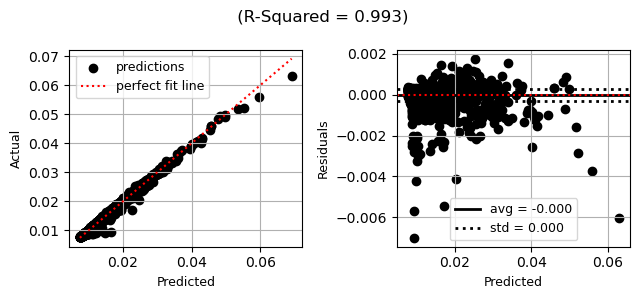

In [15]:
jenn.utils.plot.goodness_of_fit(
    y_true=Y_test, 
    y_pred=nn.predict(X_test), 
)